In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from matplotlib.patches import Ellipse
from matplotlib.colors import LinearSegmentedColormap

# Import Data

In [38]:
data = pd.read_csv('cluster_data.csv', delimiter=',', decimal='.')

In [39]:
time = data['time']
time_1 = data['time_1']
time_2 = data['time_2']
time_3 = data['time_3']
jerk = data['mean_jerk_vector']
jerk_1 = data['mean_jerk_1_vector']
jerk_2 = data['mean_jerk_2_vector']
jerk_3 = data['mean_jerk_3_vector']
jerk_y = data['mean_jerk_y']
jerk_y_1 = data['mean_jerk_1_y']
jerk_y_2 = data['mean_jerk_2_y']
jerk_y_3 = data['mean_jerk_3_y']
peaks = data['peaks_all'] #pos_peaks
peaks_1 = data['pos_peaks_1']
peaks_2 = data['pos_peaks_2']
peaks_3 = data['pos_peaks_3']
grasping_performance = data['grasping_performance']
grasping_exploratory = data['grasping_exploratory']
height = data['height']
level = data['level']
experience = data['experience']
training = data['training']
gender = data['gender']
person_name = data['person_name']

unique_colors = sns.color_palette('tab20')
color1 = 'lightblue'
color0 = 'gold'
colors = [color0, color1]

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1]


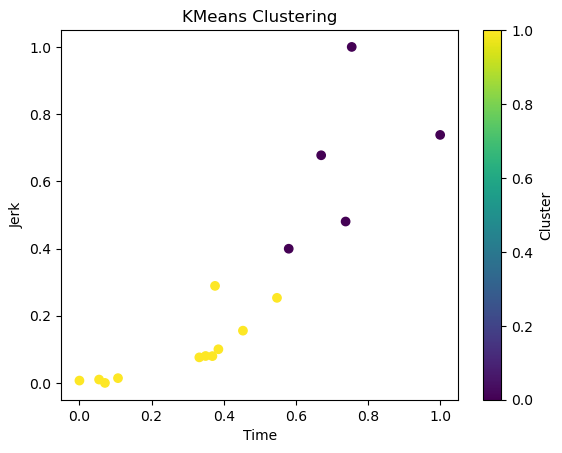

In [40]:
def plotKMeans(data, cluster):
    kmeans = KMeans(n_clusters=cluster, random_state=0, n_init='auto').fit(data)
    print(kmeans.labels_)

    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('Time')
    plt.ylabel('Jerk')
    plt.title('KMeans Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

time_jerk = np.array([[t, j] for t, j in zip(time, jerk)])
time_jerk_1 = np.array([[t, j] for t, j in zip(time_1, jerk_1)])
time_jerk_2 = np.array([[t, j] for t, j in zip(time_2, jerk_3)])
time_jerk_3 = np.array([[t, j] for t, j in zip(time_3, jerk_3)])


plotKMeans(time_jerk, 2)

Calculate gender based climbers per cluster and plot the clusters with the gender information

In [41]:
def plotGender2Clusters(data, xlabel, ylabel):
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)

    female_counts = {}
    male_counts = {}

    # Iterate over each cluster
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]

        female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))
        print(f"Cluster {colors[cluster_label]}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

    # Plot
    colors = [color0, color1]
    plt.figure(figsize=(8, 6))
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=100, label=f'Cluster {cluster_label}')

        # Annotate each point with person's name
        for i, point in enumerate(data):
            numeric_name = person_name[i][1:]
            plt.text(point[0], point[1], numeric_name, fontsize=8, ha='center', va='center')

    # Add Gender information
    plt.scatter(data[(gender == 0), 0], data[(gender == 0), 1], c='white', marker='o', edgecolors='red', label='Female', s=150, zorder=0)
    plt.scatter(data[(gender == 1), 0], data[(gender == 1), 1], c='white', marker='o', edgecolors='blue', label='Male', s=150, zorder=0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('KMeans Clustering with Gender Information')
    plt.legend()
    plt.show()

# Time and Jerk Vector

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 4 females, 1 males
Cluster lightblue: 4 females, 7 males


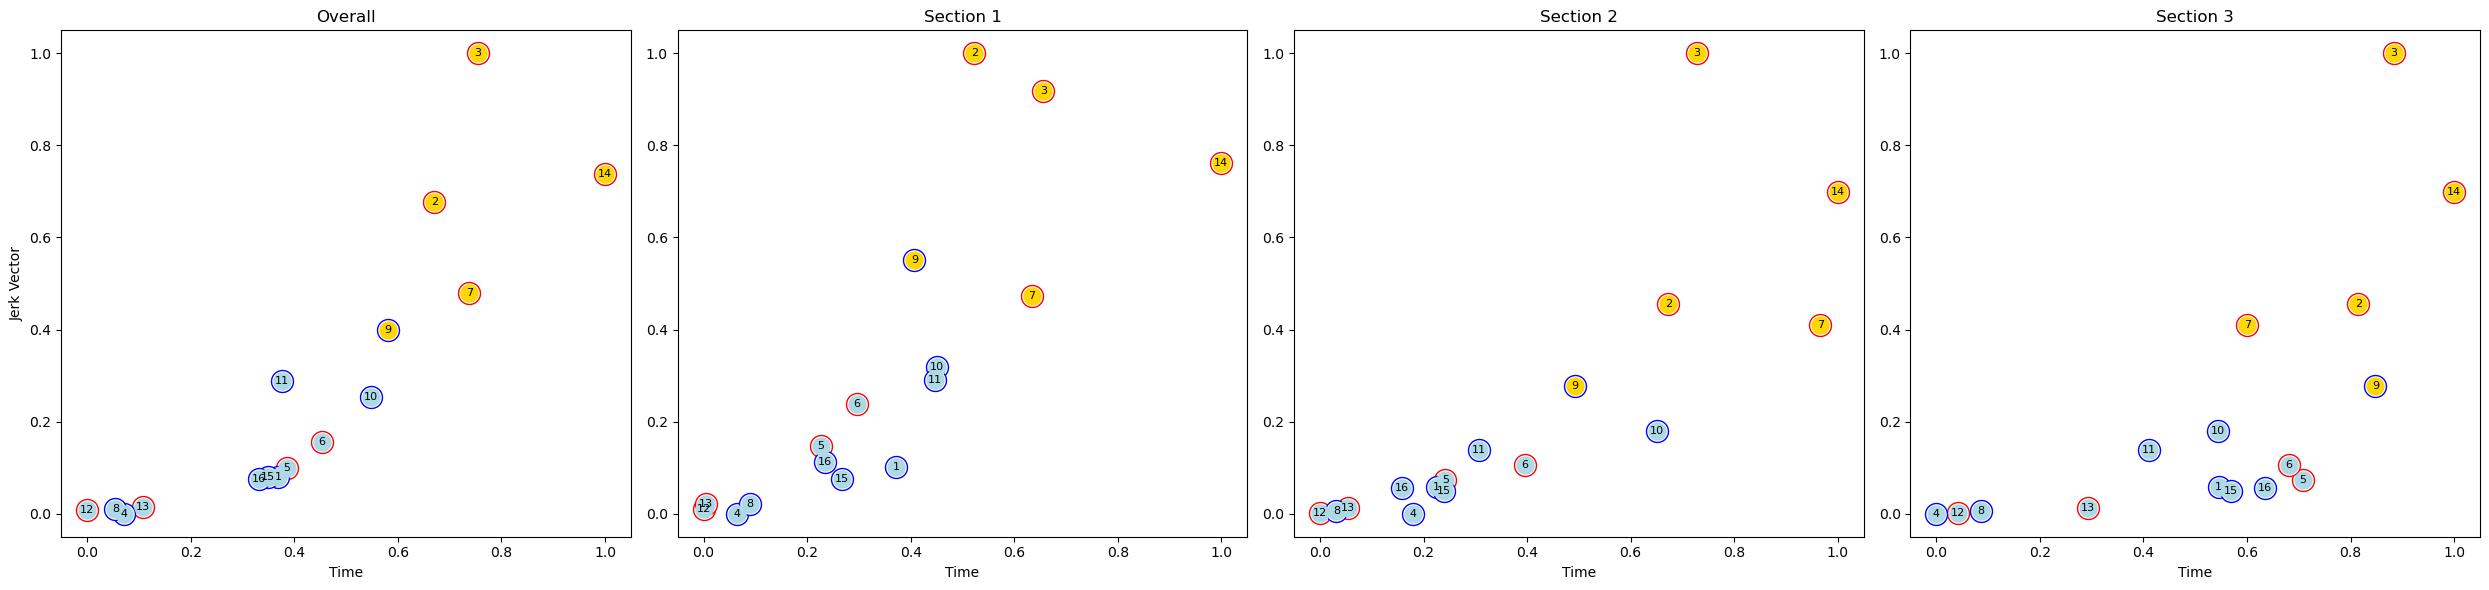

In [42]:
def plotSections2Cluster(overall, section_1, section_2, section_3, xlabel, ylabel):
    female_counts = {}
    male_counts = {}
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(overall)
    fig, axs = plt.subplots(1, 4, figsize=(25, 6))

    datasets = [overall, section_1, section_2, section_3]
    
    for j, dataset in enumerate(datasets):
        c = 0
        for cluster_label in range(2):
            female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
            male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))
            if j == 0: print(f"Cluster {colors[cluster_label]}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

            markers = ['o', 'o']  # Using circles for all points
            cluster_data = dataset[kmeans.labels_ == cluster_label]
            for i, point in enumerate(cluster_data):
                color = colors[cluster_label]
                axs[j].scatter(point[0], point[1], marker=markers[cluster_label], color=color, s=150, label=f'Cluster {cluster_label}')
                c += 1

            axs[j].scatter(dataset[(gender == 0) & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 0) & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='red', linewidth=1, facecolors='none', s=250, label='Female', zorder=0)
            axs[j].scatter(dataset[(gender == 1) & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 1) & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='blue', linewidth=1, facecolors='none', s=250, label='Male', zorder=0)

        # Annotate each point with person's name
        for i, point in enumerate(dataset):
            numeric_name = person_name[i][1:]
            axs[j].text(point[0], point[1], numeric_name, fontsize=8, ha='center', va='center')

        axs[j].set_xlabel(xlabel)
        axs[j].set_title('Section {}'.format(j))  
    axs[0].set_ylabel(ylabel)
    axs[0].set_title('Overall')  

    plt.tight_layout()
    plt.show()

plotSections2Cluster(time_jerk, time_jerk_1, time_jerk_2, time_jerk_3, 'Time', 'Jerk Vector')

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


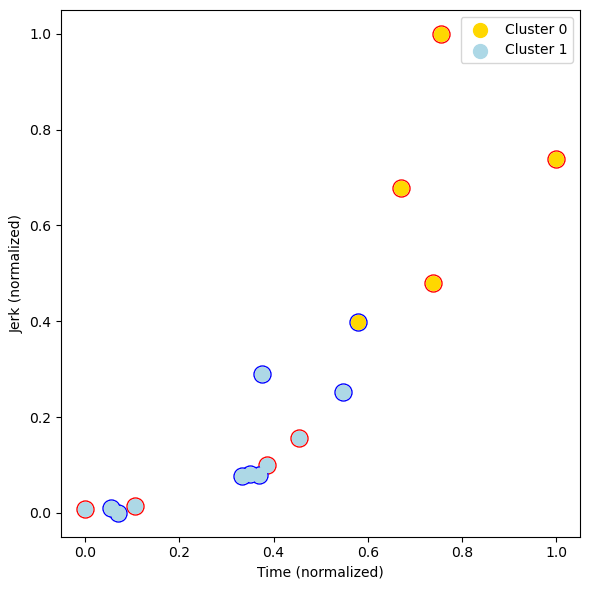

In [43]:
plt.figure(figsize=(6,6))
female_counts = {}
male_counts = {}
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(time_jerk)

dataset = time_jerk

c = 0
for cluster_label in range(2):
    markers = ['o', 'o']
    cluster_data = dataset[kmeans.labels_ == cluster_label]
    for i, point in enumerate(cluster_data):
        color = colors[cluster_label]
        if i == 0:
            plt.scatter(point[0], point[1], marker=markers[cluster_label], color=color, s=100, label=f'Cluster {cluster_label}')
        else:
            plt.scatter(point[0], point[1], marker=markers[cluster_label], color=color, s=100)
        c += 1

    plt.scatter(dataset[(gender == 0) & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 0) & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='red', linewidth=1, facecolors='none', s=150, zorder=0)
    plt.scatter(dataset[(gender == 1) & (kmeans.labels_ == cluster_label), 0], dataset[(gender == 1) & (kmeans.labels_ == cluster_label), 1], c='white', marker='o', edgecolors='blue', linewidth=1, facecolors='none', s=150, zorder=0)

plt.xlabel('Time (normalized)')
plt.ylabel('Jerk (normalized)')

plt.tight_layout()
plt.legend()
plt.savefig('Plots/clusterTimeJerk.eps')
plt.savefig('../MasterThesis/figures/clusterTimeJerk.eps')
plt.show()


# Time and Jerk Y

In [44]:
time_jerk_y_data = np.array([[t, j] for t, j in zip(time, jerk_y)])
time_jerk_y_data_1 = np.array([[t, j] for t, j in zip(time_1, jerk_y_1)])
time_jerk_y_data_2 = np.array([[t, j] for t, j in zip(time_2, jerk_y_2)])
time_jerk_y_data_3 = np.array([[t, j] for t, j in zip(time_3, jerk_y_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 4 females, 2 males
Cluster lightblue: 4 females, 6 males


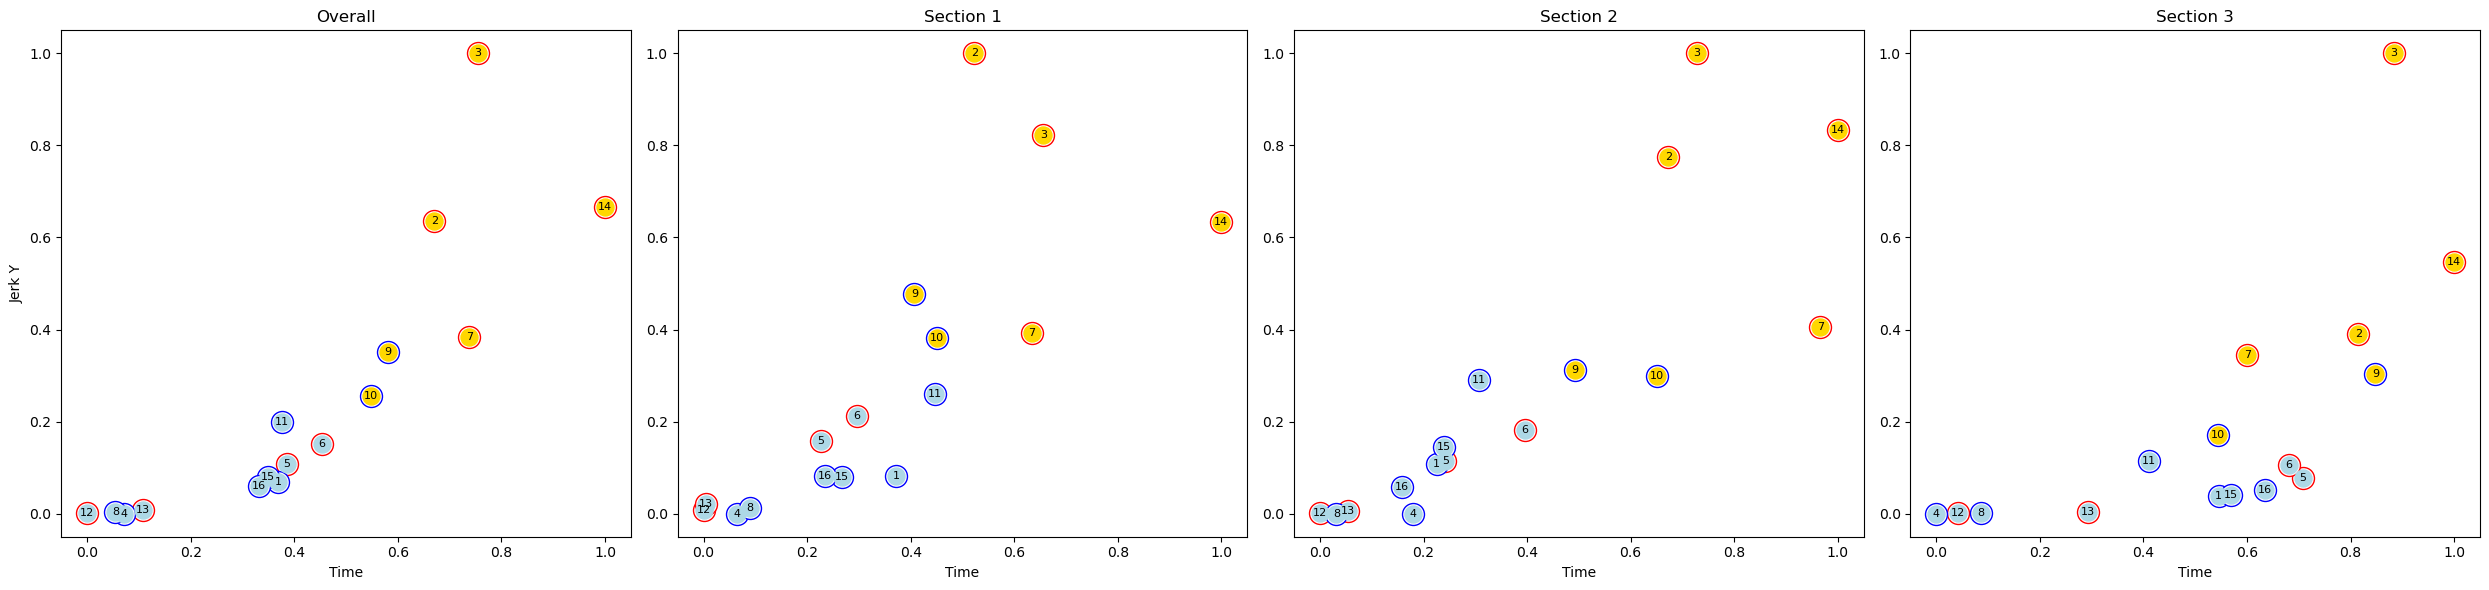

In [45]:
plotSections2Cluster(time_jerk_y_data, time_jerk_y_data_1, time_jerk_y_data_2, time_jerk_y_data_3, 'Time', 'Jerk Y')

# Time and Peaks

In [46]:
time_peaks_data = np.array([[t, j] for t, j in zip(time, peaks)])
time_peaks_data_1 = np.array([[t, j] for t, j in zip(time_1, peaks_1)])
time_peaks_data_2 = np.array([[t, j] for t, j in zip(time_2, peaks_2)])
time_peaks_data_3 = np.array([[t, j] for t, j in zip(time_3, peaks_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 6 females, 2 males
Cluster lightblue: 2 females, 6 males


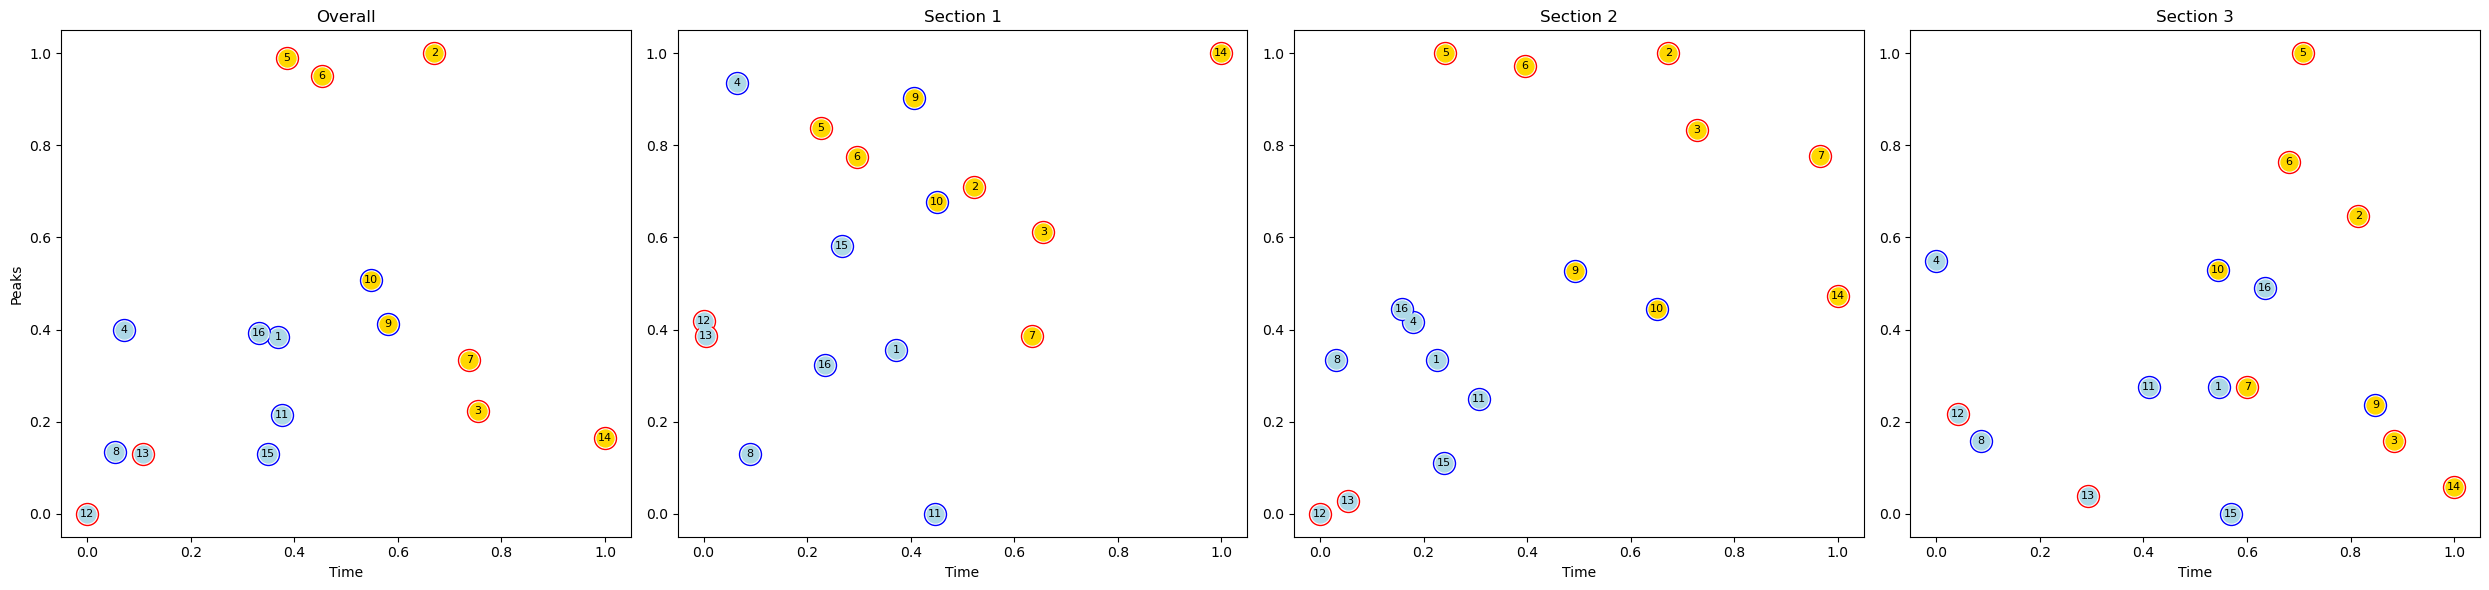

In [47]:
plotSections2Cluster(time_peaks_data, time_peaks_data_1, time_peaks_data_2, time_peaks_data_3, 'Time', 'Peaks')

# Jerk and Peaks

In [48]:
jerk_peaks_data = np.array([[t, j] for t, j in zip(jerk, peaks)])
jerk_peaks_data_1 = np.array([[t, j] for t, j in zip(jerk_1, peaks_1)])
jerk_peaks_data_2 = np.array([[t, j] for t, j in zip(jerk_2, peaks_2)])
jerk_peaks_data_3 = np.array([[t, j] for t, j in zip(jerk_3, peaks_3)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 6 females, 2 males
Cluster lightblue: 2 females, 6 males


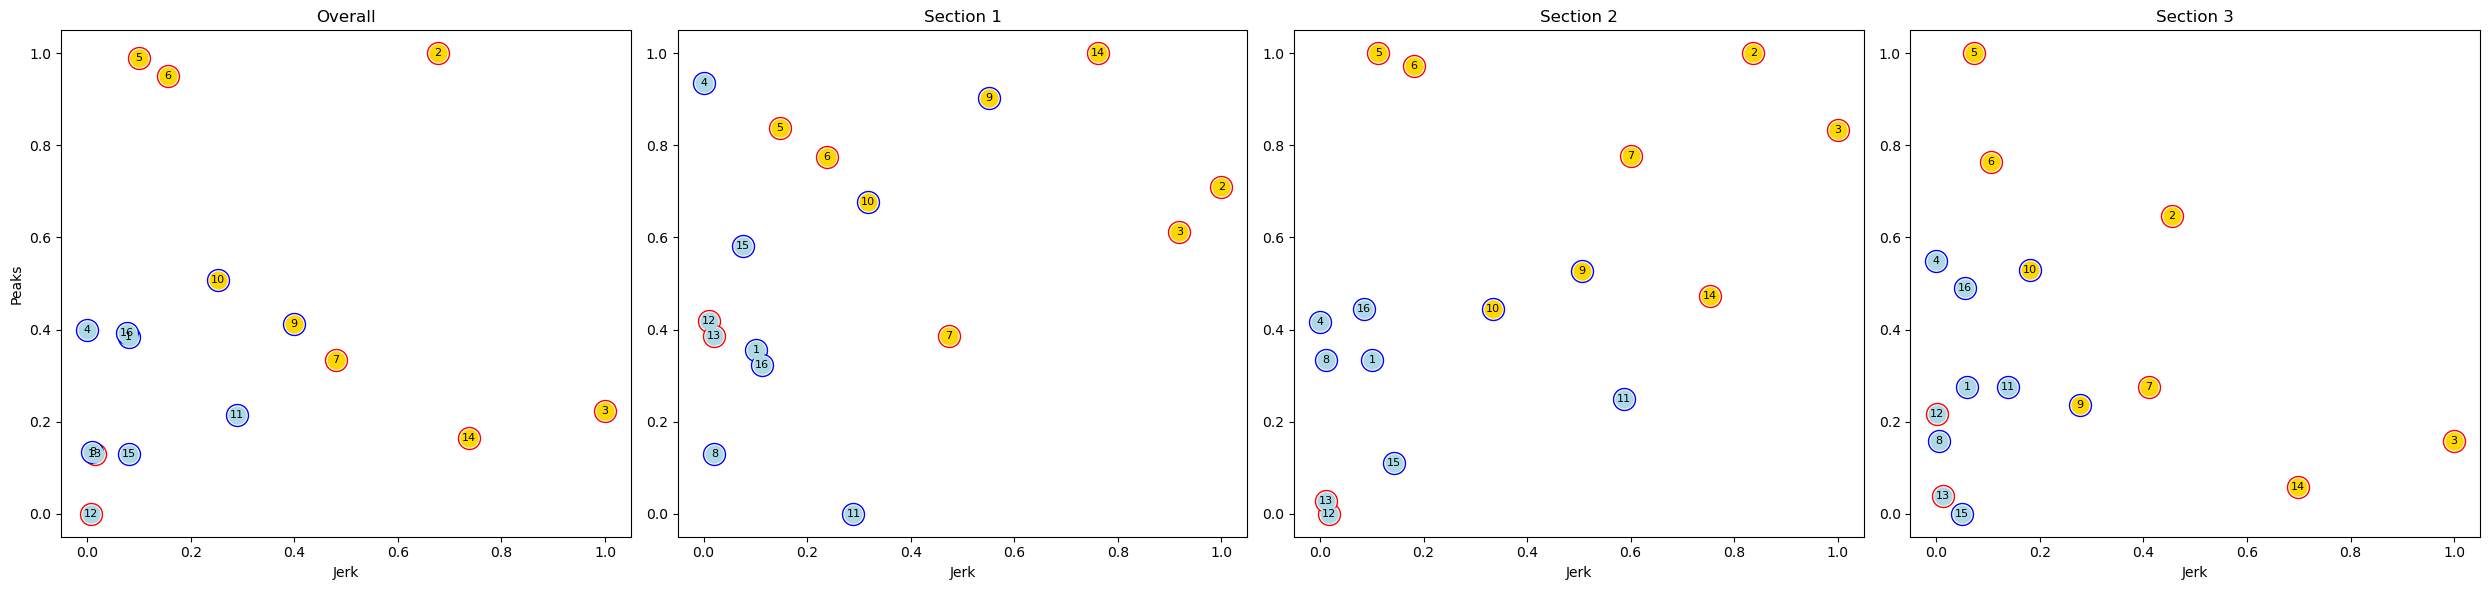

In [49]:
plotSections2Cluster(jerk_peaks_data, jerk_peaks_data_1, jerk_peaks_data_2, jerk_peaks_data_3, 'Jerk', 'Peaks')

# Anthropometric

## Height

In [50]:
height_time =  np.array([[t, j] for t, j in zip(height, time)])
height_peaks = np.array([[t, j] for t, j in zip(height, peaks)])
height_level = np.array([[t, j] for t, j in zip(height, level)])
height_jerk = np.array([[t, j] for t, j in zip(height, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 4 females, 0 males
Cluster lightblue: 4 females, 8 males
Cluster gold: 2 females, 6 males
Cluster lightblue: 6 females, 2 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 3 females, 1 males
Cluster lightblue: 5 females, 7 males
Cluster gold: 6 females, 6 males
Cluster lightblue: 2 females, 2 males


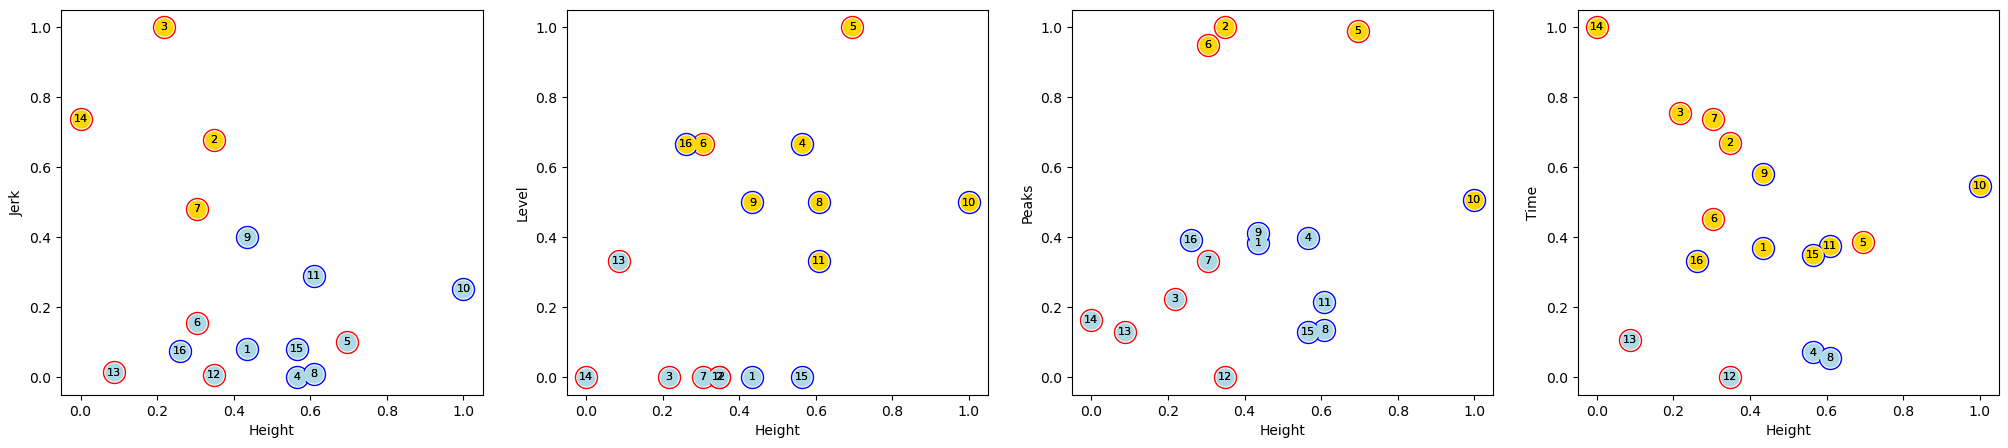

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [51]:
def subPlotGender2Clusters(axs, data, xlabel, ylabel):   
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(data)
    # Gender based counting per cluster
    female_counts = {}
    male_counts = {}

    # Iterate over each cluster
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        
        female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))

    # Print
    for cluster_label in range(2):
        print(f"Cluster {colors[cluster_label]}: {female_counts[cluster_label]} females, {male_counts[cluster_label]} males")

    # Plot
    plt.figure(figsize=(8, 6))
    for cluster_label in range(2):
        cluster_data = data[kmeans.labels_ == cluster_label]
        axs.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_label], marker='o', s=150, label=f'Cluster {cluster_label}')

    # Annotate each point with person's name
        for i, point in enumerate(data):
            numeric_name = person_name[i][1:]
            axs.text(point[0], point[1], numeric_name, fontsize=8, ha='center', va='center')


    # Add Gender information
    axs.scatter(data[(gender == 0), 0], data[(gender == 0), 1], c='white', marker='o', edgecolor='red', label='Female', s=250, zorder=0)
    axs.scatter(data[(gender == 1), 0], data[(gender == 1), 1], c='white', marker='o', edgecolor='blue', label='Male', s=250, zorder=0)

    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)

fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], height_jerk, 'Height', 'Jerk')
subPlotGender2Clusters(axs[1], height_level, 'Height', 'Level')
subPlotGender2Clusters(axs[2], height_peaks, 'Height', 'Peaks')
subPlotGender2Clusters(axs[3], height_time, 'Height', 'Time')
plt.show()

## Level

In [52]:
level_time =  np.array([[t, j] for t, j in zip(height, time)])
level_peaks = np.array([[t, j] for t, j in zip(height, peaks)])
level_height = np.array([[t, j] for t, j in zip(height, level)])
level_jerk = np.array([[t, j] for t, j in zip(height, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 6 females, 6 males
Cluster lightblue: 2 females, 2 males
Cluster gold: 3 females, 1 males
Cluster lightblue: 5 females, 7 males
Cluster gold: 2 females, 6 males
Cluster lightblue: 6 females, 2 males
Cluster gold: 4 females, 0 males
Cluster lightblue: 4 females, 8 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


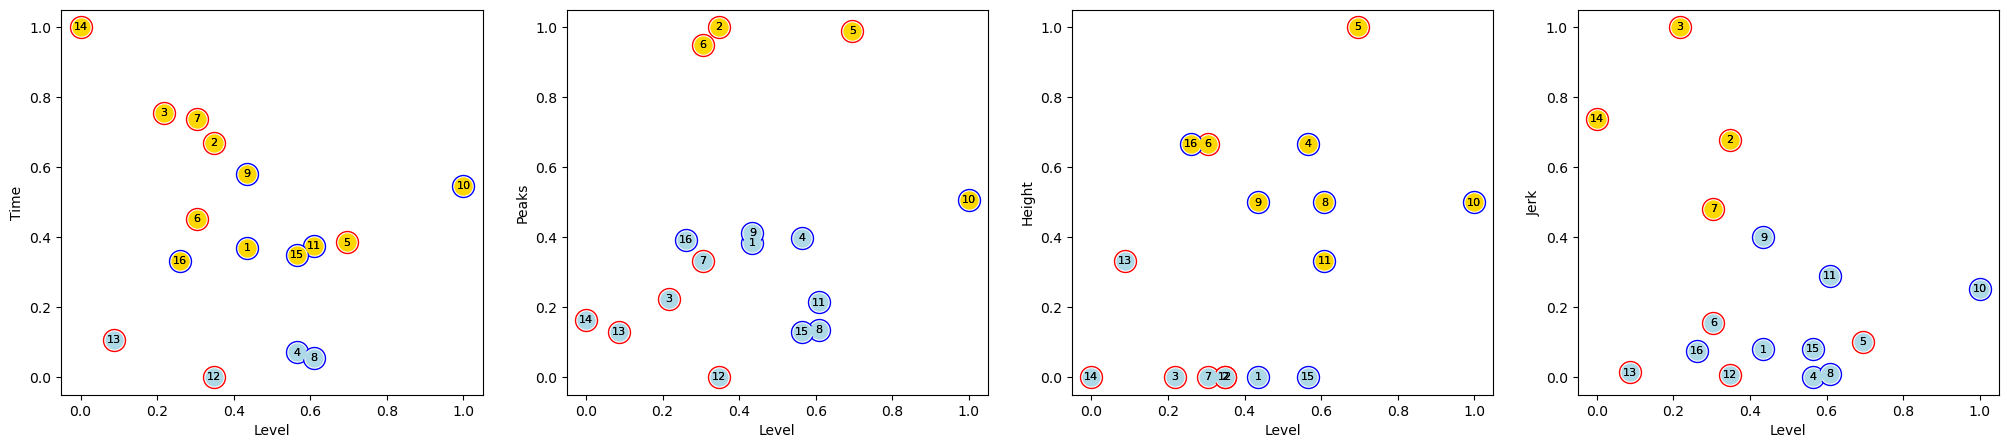

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], level_time, 'Level', 'Time')
subPlotGender2Clusters(axs[1], level_peaks, 'Level', 'Peaks')
subPlotGender2Clusters(axs[2], level_height, 'Level', 'Height')
subPlotGender2Clusters(axs[3], level_jerk, 'Level', 'Jerk')
plt.show()

## Experience

In [54]:
experience_time =  np.array([[t, j] for t, j in zip(experience, time)])
experience_peaks = np.array([[t, j] for t, j in zip(experience, peaks)])
experience_height = np.array([[t, j] for t, j in zip(experience, level)])
experience_jerk = np.array([[t, j] for t, j in zip(experience, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 6 females, 5 males
Cluster lightblue: 2 females, 3 males
Cluster gold: 7 females, 7 males
Cluster lightblue: 1 females, 1 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 3 females, 6 males
Cluster lightblue: 5 females, 2 males
Cluster gold: 4 females, 3 males
Cluster lightblue: 4 females, 5 males


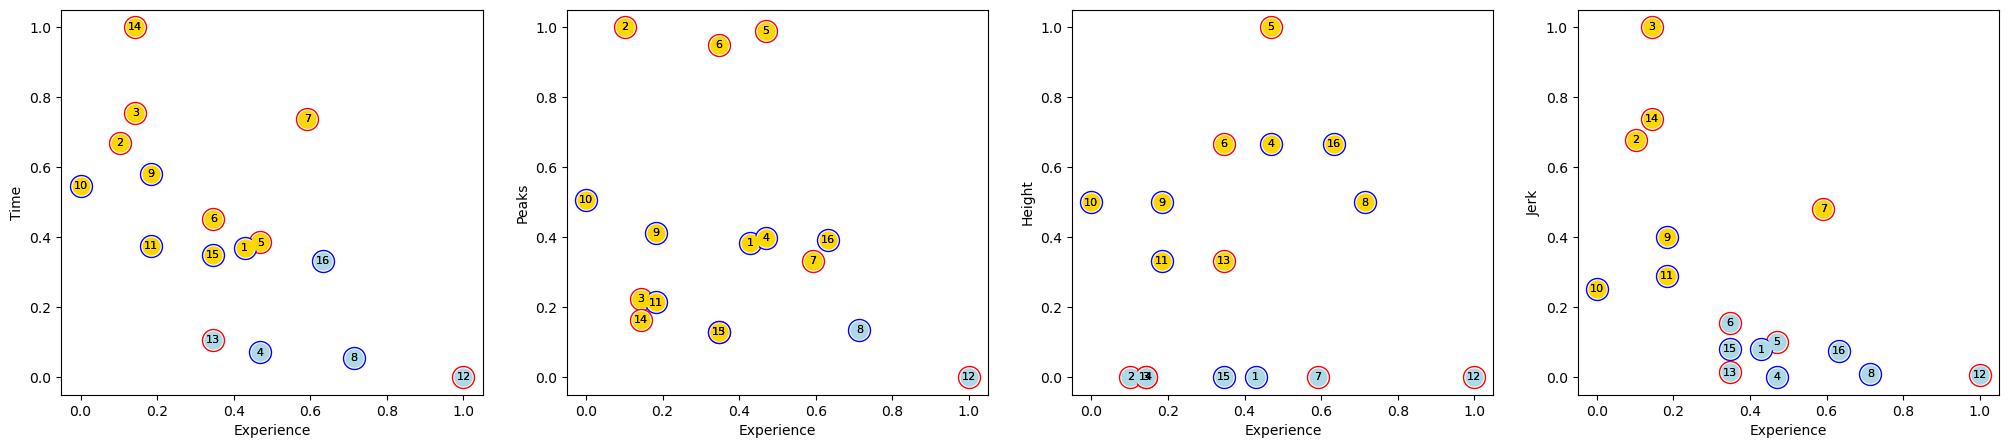

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [55]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], experience_time, 'Experience', 'Time')
subPlotGender2Clusters(axs[1], experience_peaks, 'Experience', 'Peaks')
subPlotGender2Clusters(axs[2], experience_height, 'Experience', 'Height')
subPlotGender2Clusters(axs[3], experience_jerk, 'Experience', 'Jerk')
plt.show()

## Training

In [56]:
training_time =  np.array([[t, j] for t, j in zip(training, time)])
training_peaks = np.array([[t, j] for t, j in zip(training, peaks)])
training_height = np.array([[t, j] for t, j in zip(training, level)])
training_jerk = np.array([[t, j] for t, j in zip(training, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 6 females, 3 males
Cluster lightblue: 2 females, 5 males
Cluster gold: 3 females, 0 males
Cluster lightblue: 5 females, 8 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 3 females, 5 males
Cluster lightblue: 5 females, 3 males
Cluster gold: 5 females, 4 males
Cluster lightblue: 3 females, 4 males


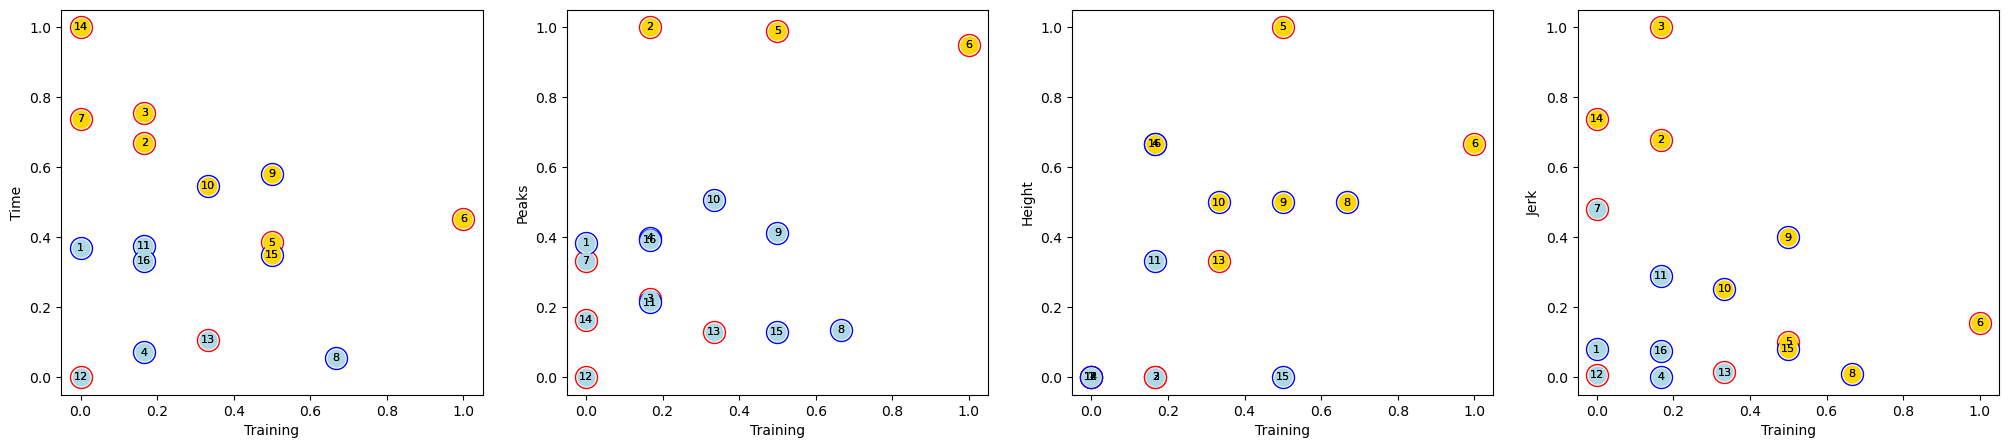

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], training_time, 'Training', 'Time')
subPlotGender2Clusters(axs[1], training_peaks, 'Training', 'Peaks')
subPlotGender2Clusters(axs[2], training_height, 'Training', 'Height')
subPlotGender2Clusters(axs[3], training_jerk, 'Training', 'Jerk')
plt.show()

# Grasping

In [58]:
grasping_time =  np.array([[t, j] for t, j in zip(grasping_performance, time)])
grasping_peaks = np.array([[t, j] for t, j in zip(grasping_performance, peaks)])
grasping_level = np.array([[t, j] for t, j in zip(grasping_performance, level)])
grasping_jerk = np.array([[t, j] for t, j in zip(grasping_performance, jerk)])

c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 4 females, 2 males
Cluster lightblue: 4 females, 6 males
Cluster gold: 3 females, 6 males
Cluster lightblue: 5 females, 2 males


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster gold: 8 females, 6 males
Cluster lightblue: 0 females, 2 males
Cluster gold: 5 females, 3 males
Cluster lightblue: 3 females, 5 males


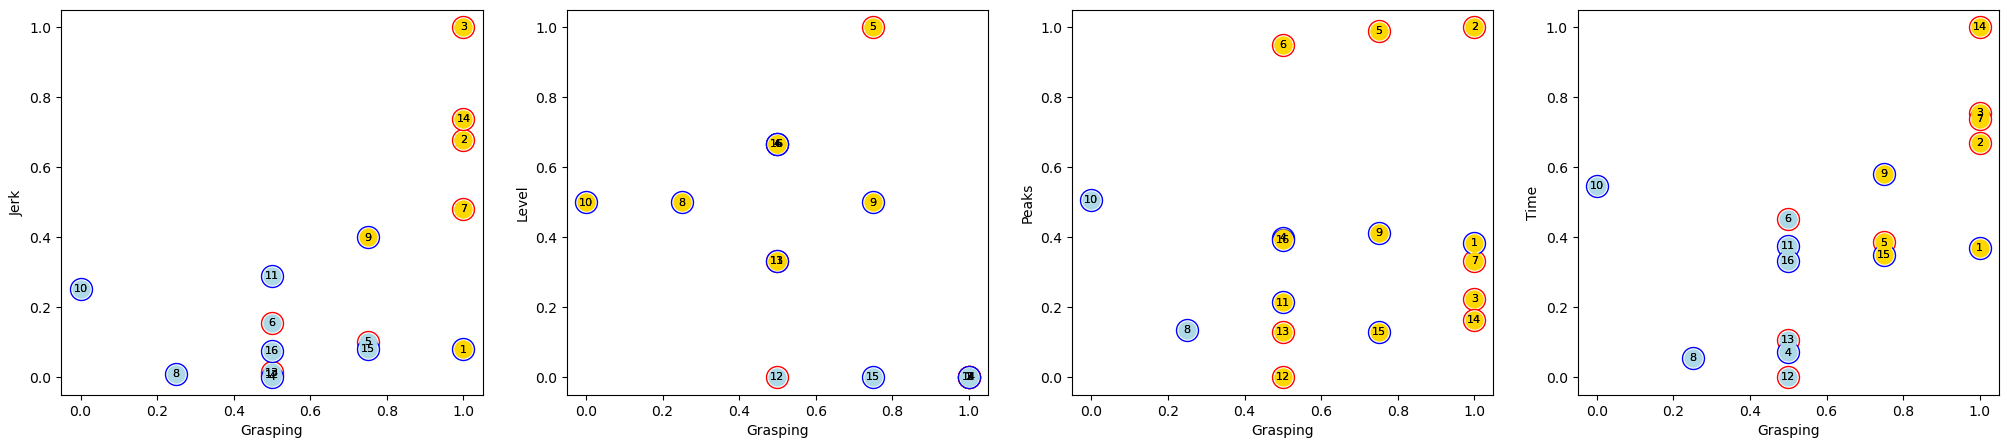

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [59]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
subPlotGender2Clusters(axs[0], grasping_jerk, 'Grasping', 'Jerk')
subPlotGender2Clusters(axs[1], grasping_level, 'Grasping', 'Level')
subPlotGender2Clusters(axs[2], grasping_peaks, 'Grasping', 'Peaks')
subPlotGender2Clusters(axs[3], grasping_time, 'Grasping', 'Time')
plt.show()

# Cluster Validation

In [60]:
data = np.array([[t, j, p] for t, j, p, h, l, e, tr, gp, ge in zip(time, jerk, peaks, height, level, experience, training, grasping_performance, grasping_exploratory)])
clusters = 2
kmeans = KMeans(n_clusters=clusters, random_state=0, n_init='auto').fit(data)

female_counts = {}
male_counts = {}

for cluster_label in range(clusters):
        cluster_data = data[kmeans.labels_ == cluster_label]
        
        female_counts[cluster_label] = np.sum((gender == 0) & (kmeans.labels_ == cluster_label))
        male_counts[cluster_label] = np.sum((gender == 1) & (kmeans.labels_ == cluster_label))
        female_percent = female_counts[cluster_label] / (female_counts[cluster_label] + male_counts[cluster_label]) * 100
        male_percent = 100 - female_percent
        print(f"Cluster {colors[cluster_label]}: {female_counts[cluster_label]} ({female_percent:.1f}%) females, {male_counts[cluster_label]} ({male_percent:.1f}%) males")
        # print(f"Cluster {cluster_label}: {female_counts[cluster_label]} ({female_percent:.1f}%) females, {male_counts[cluster_label]} ({male_percent:.1f}%) males")

cluster_dataframe = pd.DataFrame({'cluster': kmeans.labels_, 'gender': gender})

cluster_dataframe.to_csv('clustered_data.csv', sep=';', index=False)
print("DataFrame saved to 'cluster_gender_data.csv'")

Cluster gold: 6 (75.0%) females, 2 (25.0%) males
Cluster lightblue: 2 (25.0%) females, 6 (75.0%) males
DataFrame saved to 'cluster_gender_data.csv'


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
features = ['Time', 'Jerk', 'Peaks']
featuredata = pd.DataFrame(data, columns=features)
featuredata['Gender'] = gender

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


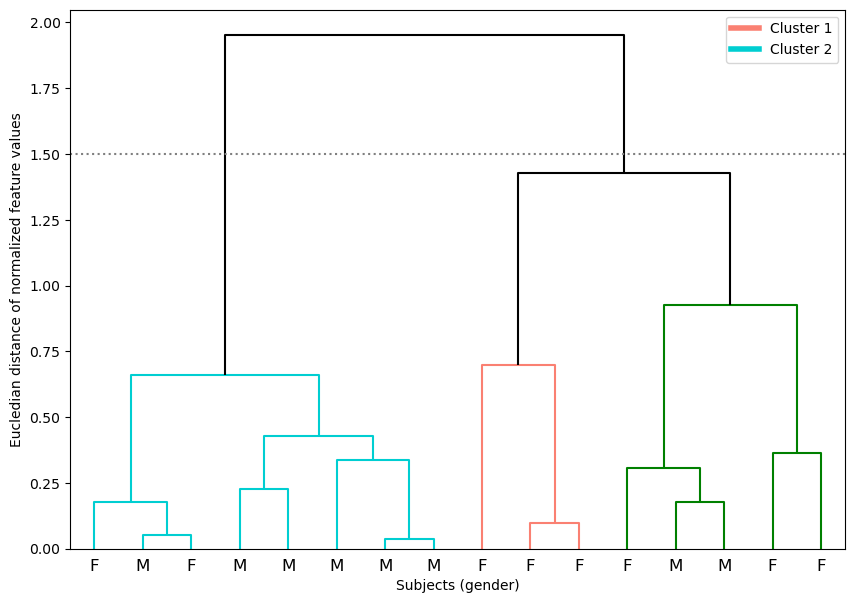

In [67]:
# Generate linkage matrix for the dendrogram
linkage_matrix = linkage(featuredata.drop('Gender', axis=1), 'ward')

# Plotting the dendrogram with gender labels
plt.figure(figsize=(10, 7))
set_link_color_palette(['darkturquoise', 'salmon', 'green'])
dendrogram(linkage_matrix, labels=['M' if g == 1 else 'F' for g in gender], above_threshold_color='k')

# Plot legends for clusters
plt.legend(handles=[
    plt.Line2D([0], [0], color='salmon', lw=4, label='Cluster 1'),
    plt.Line2D([0], [0], color='darkturquoise', lw=4, label='Cluster 2')
], loc='upper right')

plt.axhline(y=1.5, color='gray', linestyle=':')

plt.xlabel('Subjects (gender)')
plt.ylabel('Eucledian distance of normalized feature values')
plt.savefig('../MasterThesis/figures/Dendrogram.eps')
plt.savefig('./Diagrams/Dendrogram.eps')
plt.savefig('./Diagrams/Dendrogram.png')
plt.show()

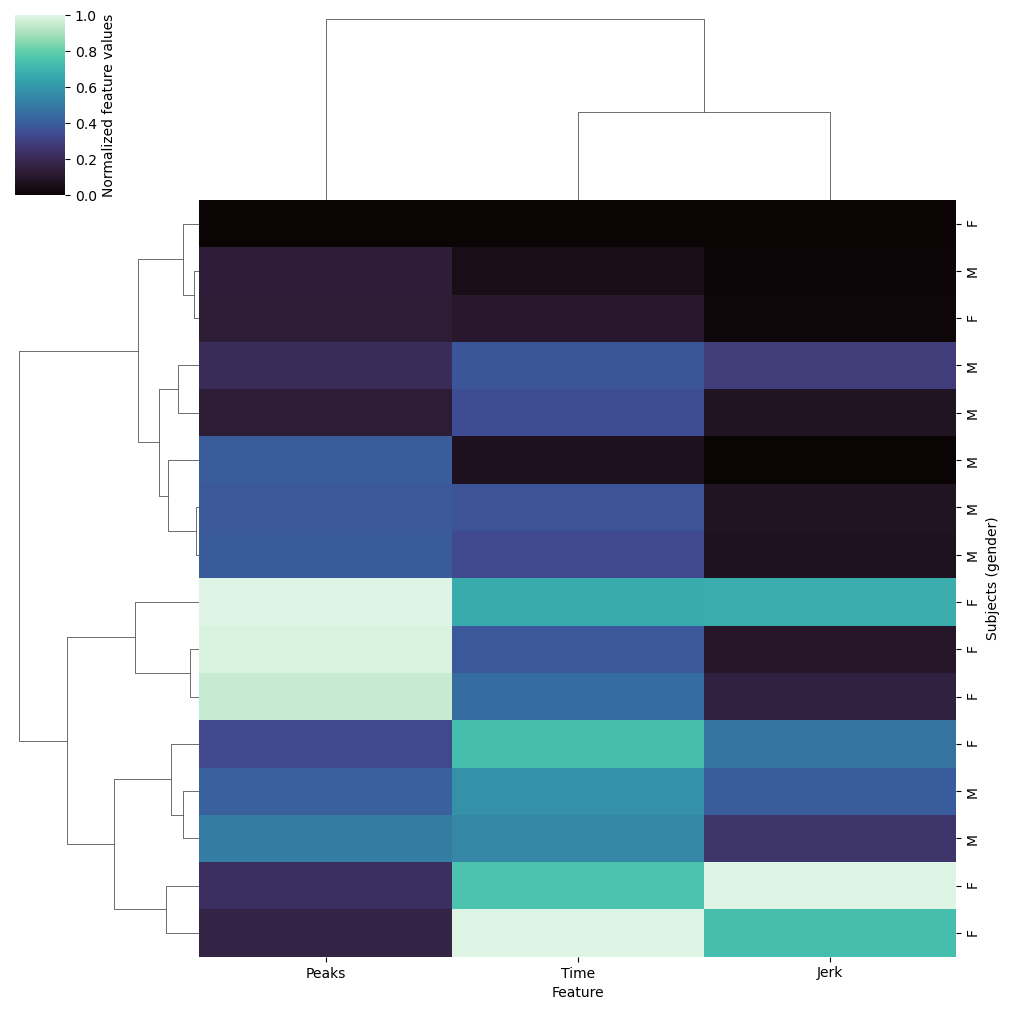

In [63]:
# Create clustermap
clustergrid = sns.clustermap(featuredata.drop('Gender', axis=1),  method='ward', cmap='mako')

# Reorder the gender labels according to the clustered rows
ordered_gender = [gender[i] for i in clustergrid.dendrogram_row.reordered_ind]
y_labels=['M' if g == 1 else 'F' for g in ordered_gender]
clustergrid.ax_heatmap.set_yticklabels(y_labels)
clustergrid.ax_heatmap.set_xlabel('Feature')
clustergrid.ax_heatmap.set_ylabel('Subjects (gender)')
plt.ylabel('Normalized feature values')
plt.savefig('./Diagrams/ClusterMap.eps')
plt.savefig('./Diagrams/ClusterMap.jpg')
plt.savefig('../MasterThesis/figures/ClusterMap.eps')
plt.show()

In [64]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import pearsonr
from joblib import Parallel, delayed



# Calculate pairwise distances for original and clustered data
original_distances = pdist(data)
cluster_distances = pdist(kmeans.cluster_centers_[kmeans.labels_])

# Convert distances to squareform matrices
original_distances_matrix = squareform(original_distances)
cluster_distances_matrix = squareform(cluster_distances)

# Calculate the Normalized Hubert’s Gamma Statistic (T)
hubert_gamma, _ = pearsonr(original_distances_matrix.ravel(), cluster_distances_matrix.ravel())
print(f'Normalized Hubert’s Gamma Statistic: {hubert_gamma}')

silhouette_avg = silhouette_score(data, kmeans.labels_)
davies_bouldin = davies_bouldin_score(data, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(data, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')


# # Define the number of bootstrap iterations
# n_bootstraps = 10000

# # Define function for bootstrapping
# def bootstrap_gamma(original_distances_matrix, data, kmeans):
#     # Perform KMeans clustering on resampled data
#     resampled_indices = np.random.choice(len(data), len(data), replace=True)
#     resampled_data = data[resampled_indices]
#     resampled_kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(resampled_data)

#     # Calculate pairwise distances for resampled clustered data
#     resampled_cluster_distances = pdist(resampled_kmeans.cluster_centers_[resampled_kmeans.labels_])
#     resampled_cluster_distances_matrix = squareform(resampled_cluster_distances)

#     # Calculate Hubert’s Gamma Statistic for resampled data
#     resampled_gamma, _ = pearsonr(original_distances_matrix.ravel(), resampled_cluster_distances_matrix.ravel())
#     return resampled_gamma

# # Bootstrap for approximately unbiased testing using parallel processing
# gamma_bootstraps = Parallel(n_jobs=-1)(delayed(bootstrap_gamma)(original_distances_matrix, data, kmeans) for _ in range(n_bootstraps))

# # Calculate p-value
# p_value = (np.sum(np.abs(gamma_bootstraps) >= np.abs(hubert_gamma)) + 1) / (n_bootstraps + 1)
# print(f'Approximately unbiased p-value: {p_value}')

# Normalized Hubert’s Gamma Statistic: 0.5566408759523768
# Approximately unbiased p-value: 0.00019998000199980003


Normalized Hubert’s Gamma Statistic: 0.5593112652409536
Silhouette Score: 0.3841546776283564
Davies-Bouldin Index: 0.964804634647689
Calinski-Harabasz Index: 11.928248669725885


c:\Users\dorot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


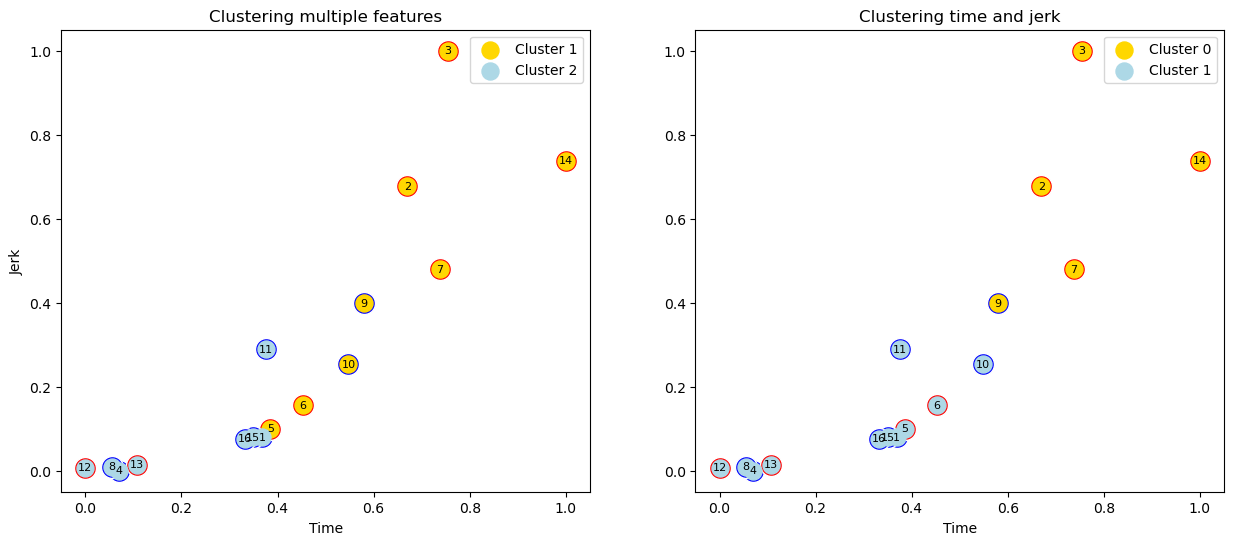

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Cluster 1 in the first plot
cluster0 = data[kmeans.labels_ == 0]
axs[0].scatter(cluster0[:, 0], cluster0[:, 1], c=color0, marker='o', s=150, label='Cluster 1')

# Plotting Cluster 2 in the first plot
cluster1 = data[kmeans.labels_ == 1]
axs[0].scatter(cluster1[:, 0], cluster1[:, 1], c=color1, marker='o', s=150, label='Cluster 2')

# Adding numbers for each data point and distinguishing genders in the first plot
for i, (t, j) in enumerate(zip(time, jerk)):
    axs[0].text(t, j, str(i+1), fontsize=8, ha='center', va='center')
    axs[0].scatter(t, j, c='red' if gender[i] == 0 else 'blue', marker='o', edgecolor='white', s=250, zorder=0)

# Clustering time and jerk
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(time_jerk)
for cluster_label in range(2):
    cluster_data = time_jerk[kmeans.labels_ == cluster_label]
    axs[1].scatter(cluster_data[:, 0], cluster_data[:, 1], c=color0 if cluster_label == 0 else color1, marker='o', s=150, label=f'Cluster {cluster_label}')

# Adding gender information in the second plot
for i, (t, j) in enumerate(zip(time, jerk)):
    axs[1].scatter(t, j, c='red' if gender[i] == 0 else 'blue', marker='o', edgecolor='white', s=250, zorder=0)

# Annotating with person's name in the second plot
for i, (t, j) in enumerate(zip(time, jerk)):
    numeric_name = person_name[i][1:]
    axs[1].text(t, j, numeric_name, fontsize=8, ha='center', va='center')

# Setting labels and titles
axs[0].set_ylabel('Jerk')
axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')
axs[0].set_title('Clustering multiple features')
axs[1].set_title('Clustering time and jerk')
axs[0].legend()
axs[1].legend()

plt.show()


# Save Cluster and Gender

With 7f, 1m and 2f, 7m there is a significant difference between both genders with Chi-square(1) = 7.244, p = 0.007

In [66]:
cluster_dataframe.to_csv('clustered_data.csv', sep=';', index=False)
print("DataFrame saved to 'cluster_gender_data.csv'")

DataFrame saved to 'cluster_gender_data.csv'
